## <span style="color: blue">IMPORT NHỮNG THƯ VIỆN CẦN THIẾT & LOAD DỮ LIỆU</span>


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from functools import reduce


In [91]:
file_path = r"C:\Users\NGOC HUYEN\Downloads\(DATA STORYTELLING) 2025 FINAL DATA.xlsx" #thay đổi đường dẫn
#thay đổi đường dẫn

## <span style="color: blue">1. BIỂU ĐỒ THỂ HIỆN THỰC TRẠNG CỦA 7 QUỐC GIA GIAI ĐOẠN TỪ 2014-2024</span>


## 1.1. Biểu đồ thể hiện 7 trụ cột của 7 quốc gia theo thứ hạng & điểm 

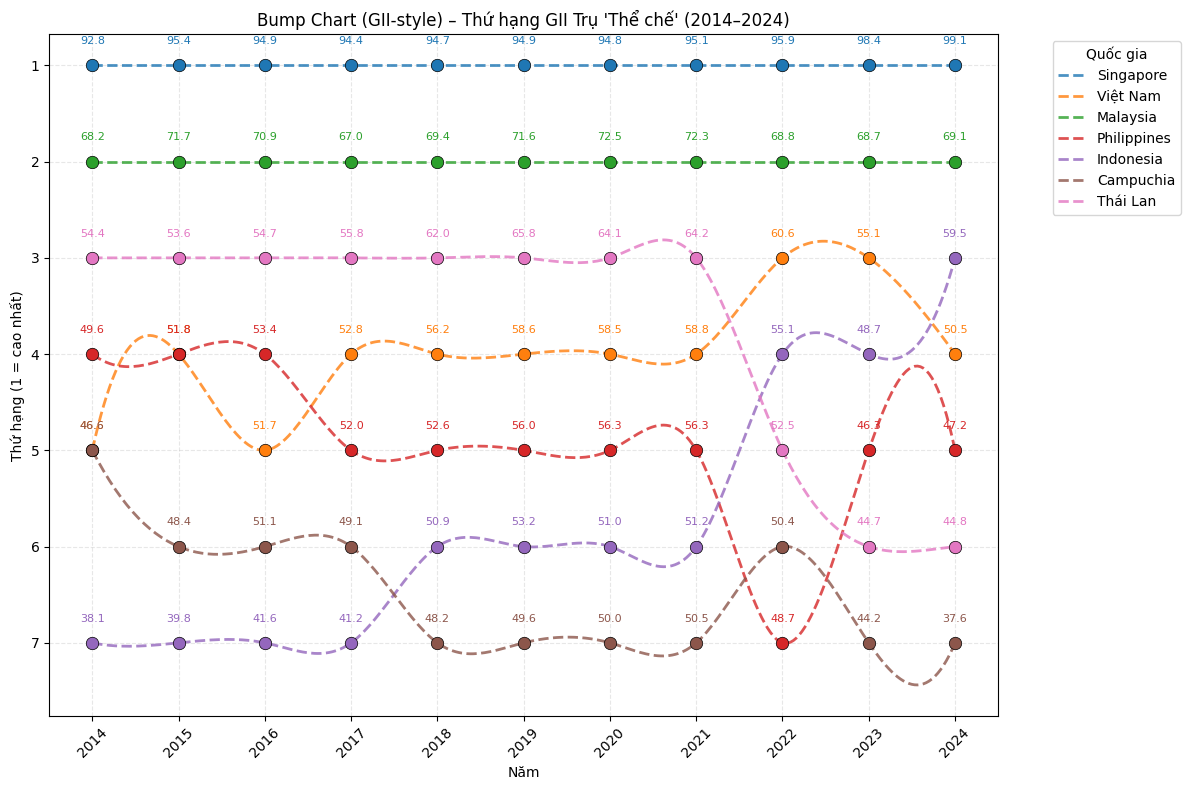

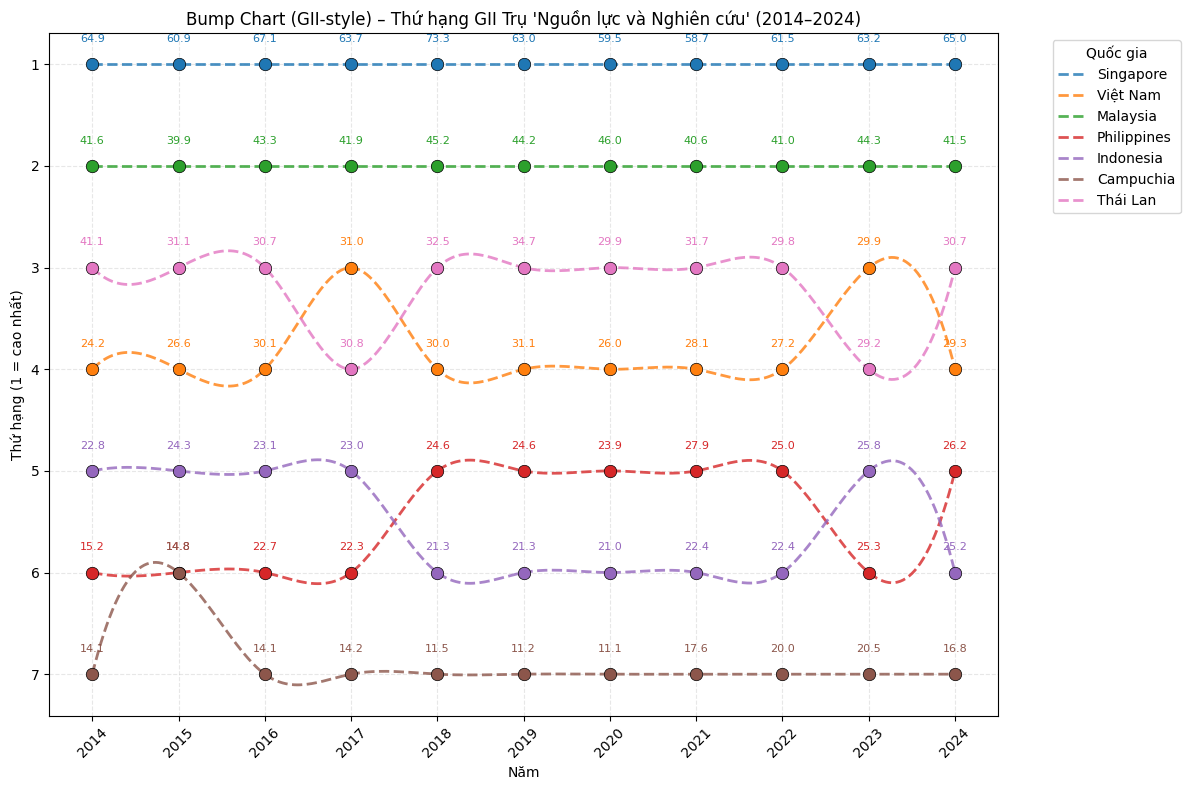

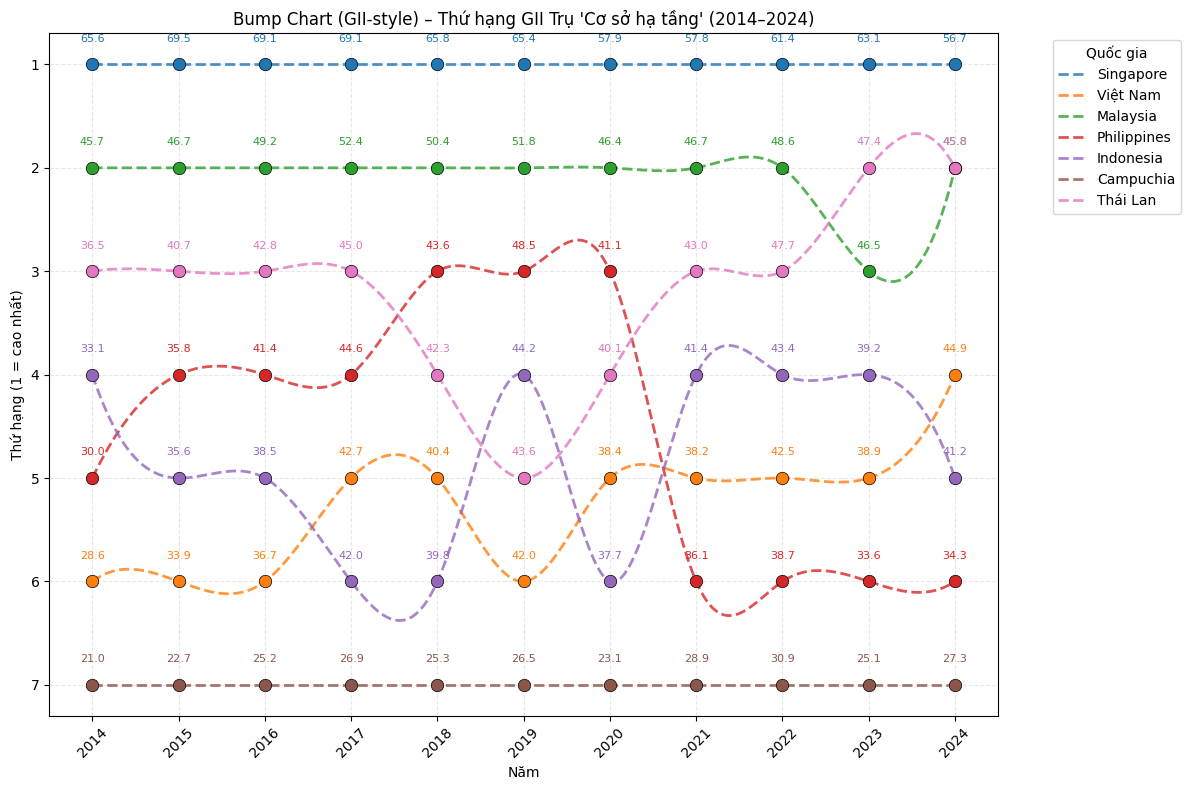

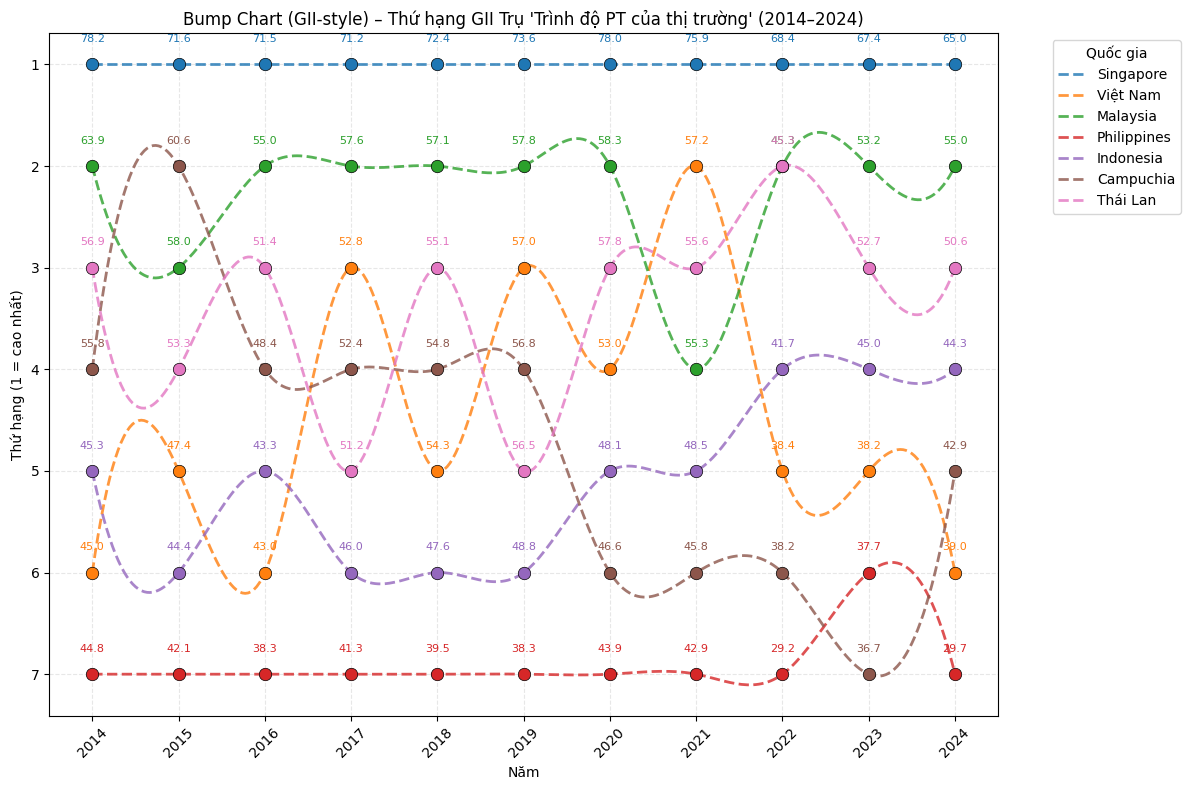

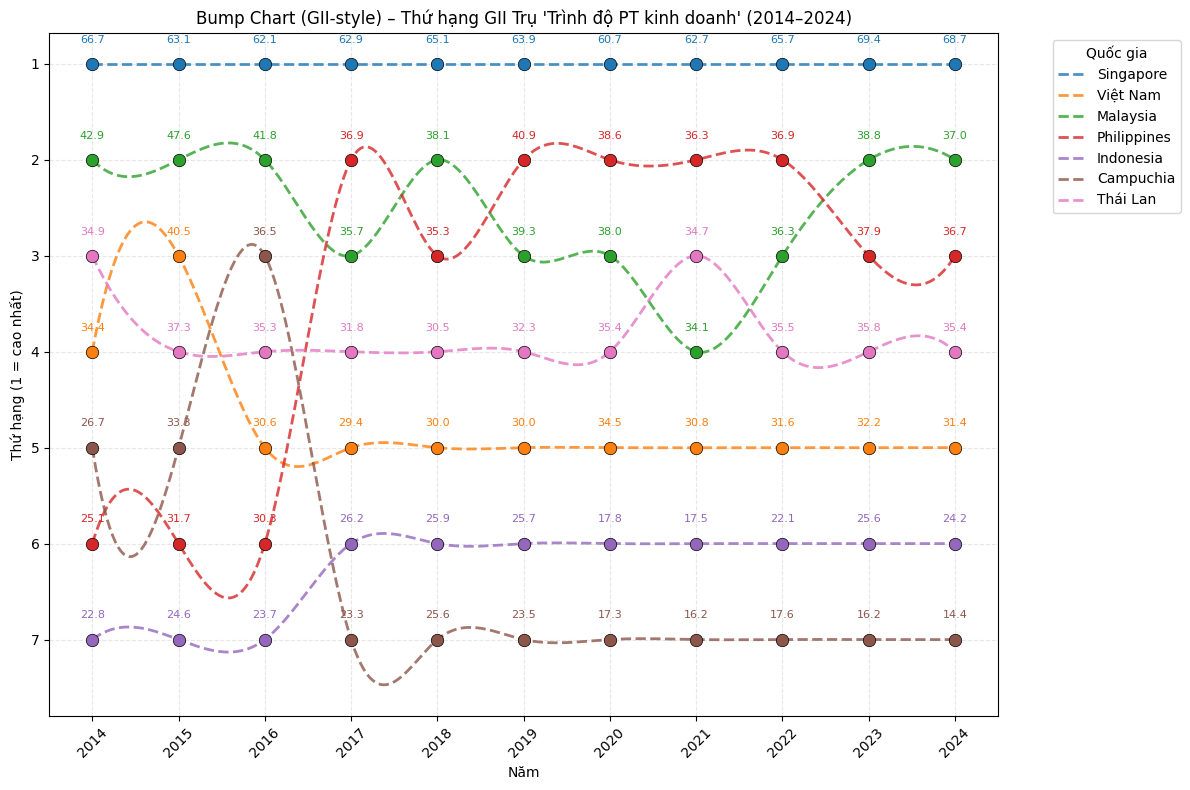

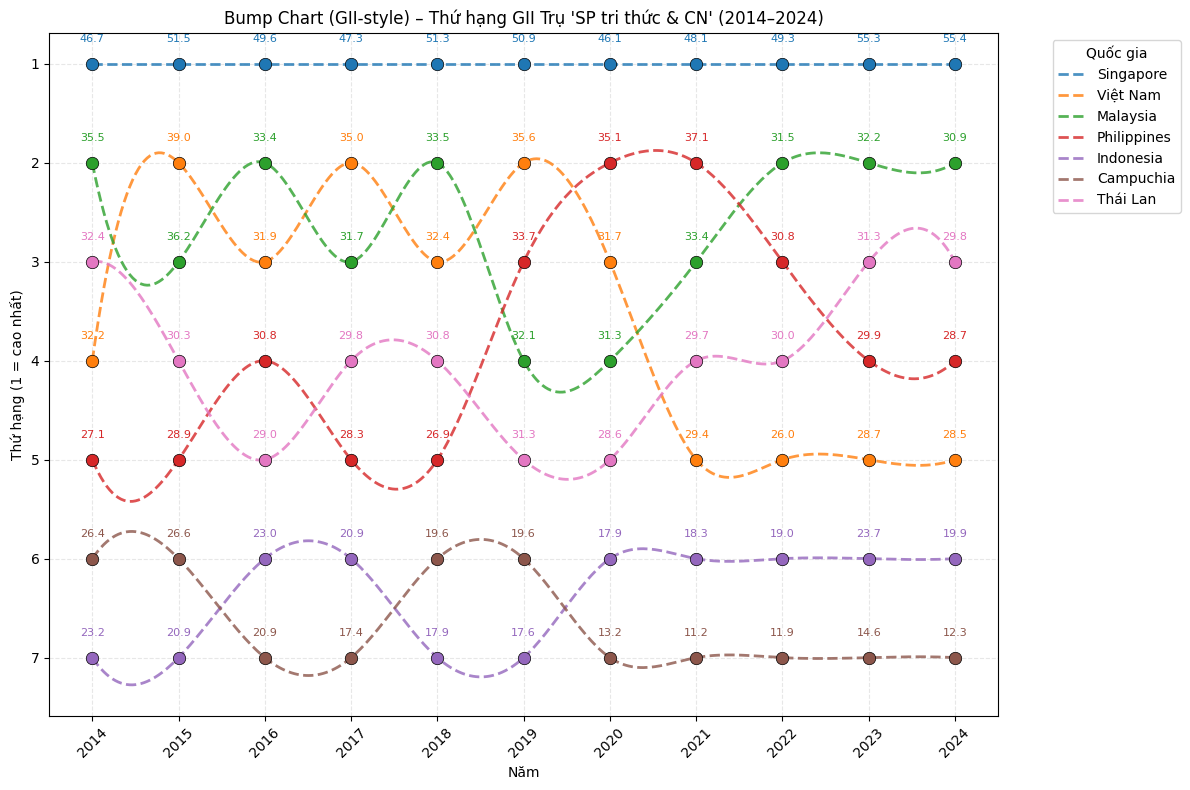

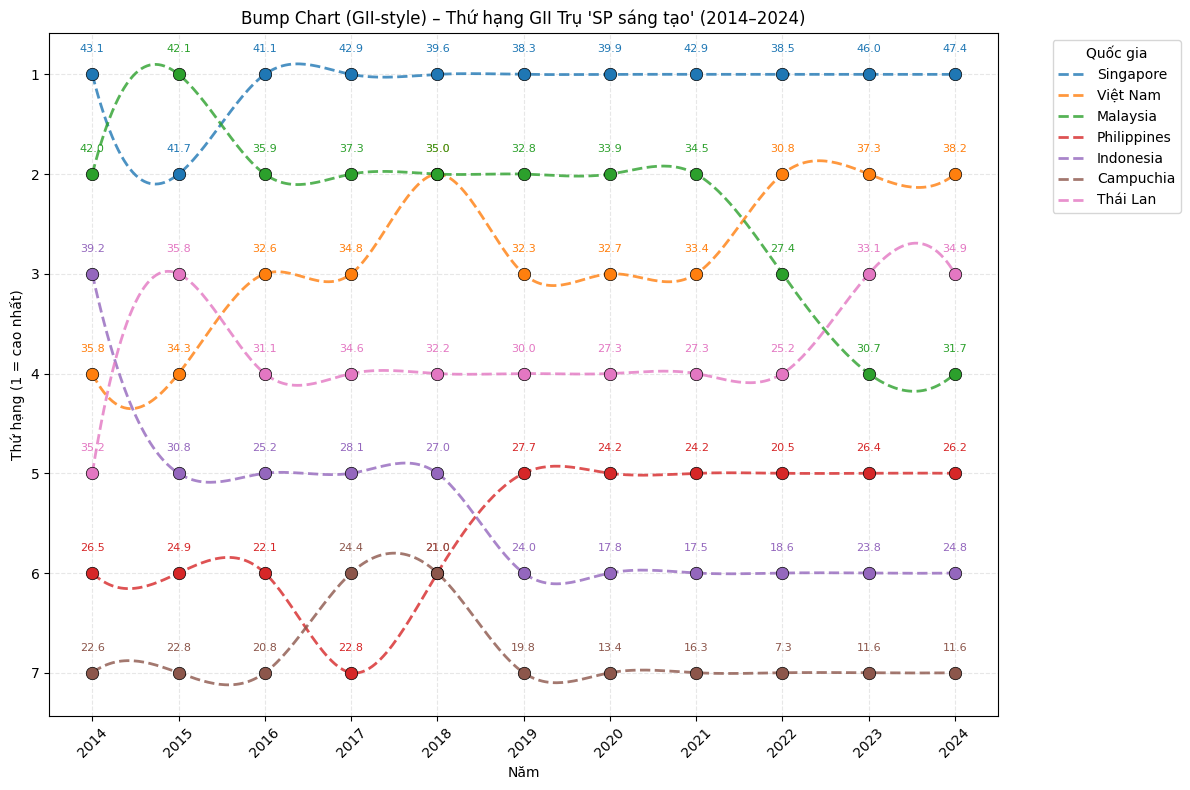

In [89]:
# 1. Đọc dữ liệu
df_all = pd.read_excel(file_path, sheet_name = "bumpchart" )

# 2. Đổi tên cột cho chuẩn
df_all.columns = ["Country", "Year", "Pillar", "Score", "Rank"]
df_all["Year"] = df_all["Year"].astype(int)

# 3. Lọc giai đoạn 2014–2024
df_filtered = df_all[df_all["Year"].between(2014, 2024)]

# 4. Vẽ 7 bump chart (1 chart cho mỗi trụ)
pillars = df_filtered["Pillar"].unique()
colors = plt.cm.tab10.colors  # bảng màu cho quốc gia

for selected_pillar in pillars:
    df_pillar = df_filtered[df_filtered["Pillar"] == selected_pillar]
    countries = df_pillar["Country"].unique()
    years = sorted(df_pillar["Year"].unique())

    plt.figure(figsize=(12, 8))

    for idx, country in enumerate(countries):
        data = df_pillar[df_pillar["Country"] == country].sort_values("Year")
        x = data["Year"].values
        y = data["Rank"].values
        scores = data["Score"].values

        # Làm mượt đường cong bằng spline
        x_smooth = np.linspace(x.min(), x.max(), 300)
        spline = make_interp_spline(x, y, k=3)
        y_smooth = spline(x_smooth)

        color = colors[idx % len(colors)]
        plt.plot(x_smooth, y_smooth, linestyle='--', linewidth=2, color=color, alpha=0.8, label=country)
        plt.scatter(x, y, s=80, color=color, edgecolor='black', marker='o', linewidth=0.5, zorder=3)

        # Gắn nhãn điểm số
        for xi, yi, score in zip(x, y, scores):
            plt.text(xi, yi - 0.2, f"{score:.1f}", ha='center', va='bottom', fontsize=8, color=color)

    # Thiết lập biểu đồ
    plt.gca().invert_yaxis()
    plt.xticks(years, rotation=45)
    plt.yticks(range(1, len(countries) + 1))
    plt.title(f"Bump Chart (GII-style) – Thứ hạng GII Trụ '{selected_pillar}' (2014–2024)")
    plt.xlabel("Năm")
    plt.ylabel("Thứ hạng (1 = cao nhất)")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title="Quốc gia", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## 1.2. Thứ hạng và biểu đồ trung bình của 7 quốc gia ASEAN

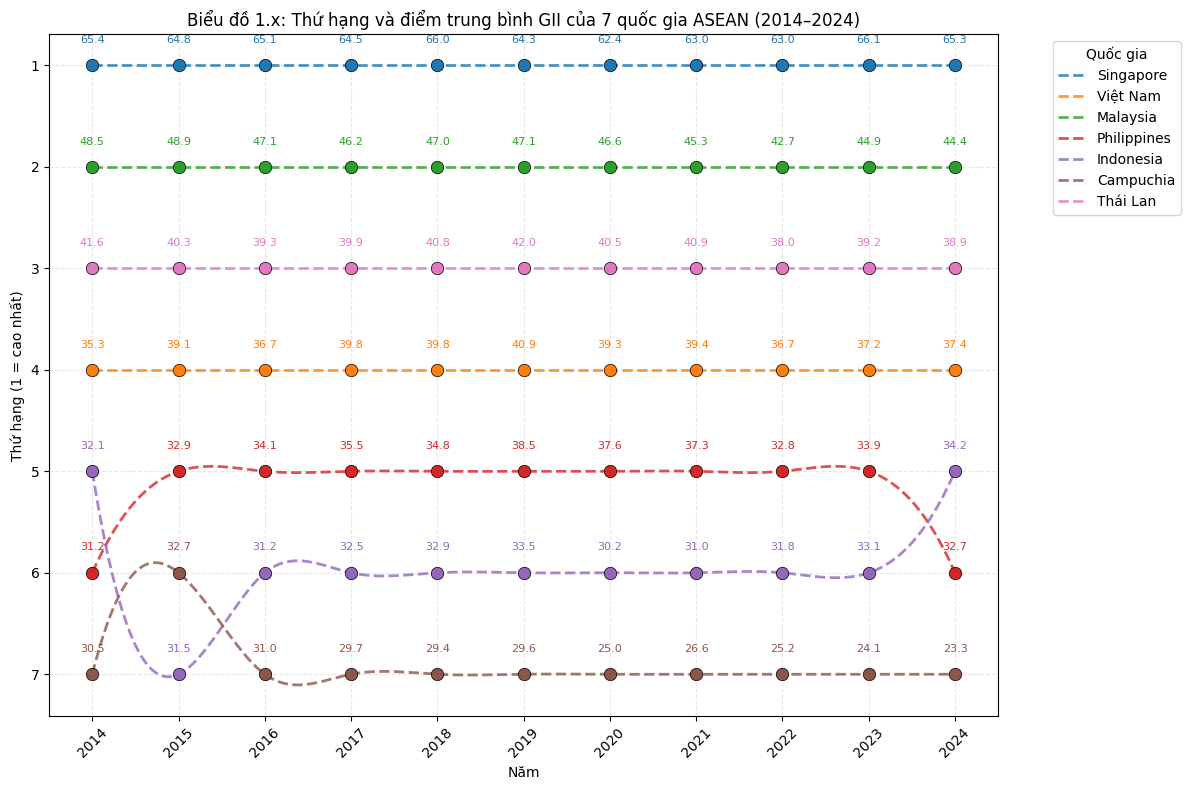

In [ ]:
# Load file
excel_file = pd.ExcelFile(file_path)

# 3. Danh sách các trụ cột GII
gii_sheets = [
    "Thể chế", "Nguồn lực và Nghiên cứu", "Cơ sở hạ tầng",
    "Trình độ PT của thị trường", "Trình độ PT kinh doanh",
    "SP tri thức & CN", "SP sáng tạo"
]

# 4. Gộp dữ liệu các trụ cột thành một bảng lớn
gii_dataframes = []
for sheet in gii_sheets:
    df = excel_file.parse(sheet)
    df["Trụ cột"] = sheet
    gii_dataframes.append(df)
df_all_gii = pd.concat(gii_dataframes, ignore_index=True)

# 5. Tính điểm GII trung bình mỗi năm theo quốc gia
df_avg_gii = df_all_gii.drop(columns=["Trụ cột"])
df_avg = df_avg_gii.groupby("Quốc gia").mean(numeric_only=True).reset_index()
df_avg_long = df_avg.melt(id_vars="Quốc gia", var_name="Năm", value_name="GII Trung bình")
df_avg_long["Năm"] = df_avg_long["Năm"].astype(int)

# 6. Tính thứ hạng GII trung bình (cao hơn = hạng tốt hơn)
df_ranked = df_avg_long.copy()
df_ranked["Rank"] = df_ranked.groupby("Năm")["GII Trung bình"].rank(ascending=False, method="min")

# 7. Lọc 7 quốc gia ASEAN
asean_countries = ["Singapore", "Việt Nam", "Malaysia", "Philippines", "Indonesia", "Campuchia", "Thái Lan"]
df_ranked = df_ranked[df_ranked["Quốc gia"].isin(asean_countries)]

# 8. Vẽ biểu đồ bump chart với spline và điểm số trên từng điểm
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors

for idx, country in enumerate(asean_countries):
    df_country = df_ranked[df_ranked["Quốc gia"] == country].sort_values("Năm")
    x = df_country["Năm"].values
    y = df_country["Rank"].values
    scores = df_country["GII Trung bình"].values

    # Làm mượt spline
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    color = colors[idx % len(colors)]
    plt.plot(x_smooth, y_smooth, linestyle='--', linewidth=2, color=color, alpha=0.8, label=country)
    plt.scatter(x, y, s=80, color=color, edgecolor='black', marker='o', linewidth=0.5, zorder=3)

    # Gắn nhãn điểm số
    for xi, yi, score in zip(x, y, scores):
        plt.text(xi, yi - 0.2, f"{score:.1f}", ha='center', va='bottom', fontsize=8, color=color)

# 9. Cấu hình biểu đồ
plt.gca().invert_yaxis()
plt.xticks(sorted(df_ranked["Năm"].unique()), rotation=45)
plt.yticks(range(1, len(asean_countries) + 1))
plt.title("Biểu đồ 1.x: Thứ hạng và điểm trung bình GII của 7 quốc gia ASEAN (2014–2024)")
plt.xlabel("Năm")
plt.ylabel("Thứ hạng (1 = cao nhất)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Quốc gia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 1.3. Tăng trưởng của 7 quốc gia theo giai đoạn 2014-2024

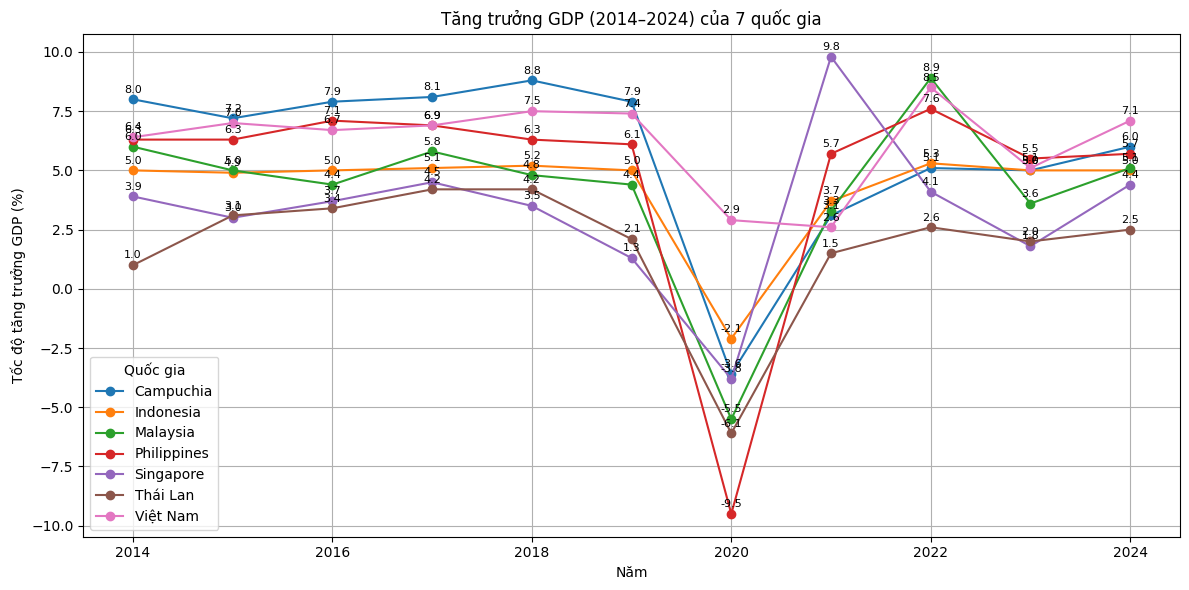

In [86]:
excel_file = pd.ExcelFile(file_path)
df_gdp = excel_file.parse("gdpgrowth")

# Bước 2: Chọn 7 quốc gia đầu tiên
selected_countries = df_gdp["Quốc gia"].head(7)
df_plot = df_gdp[df_gdp["Quốc gia"].isin(selected_countries)]

# Bước 3: Chuyển dữ liệu sang long format
df_long = df_plot.melt(id_vars="Quốc gia", var_name="Năm", value_name="GDP Growth (%)")
df_long["Năm"] = df_long["Năm"].astype(int)

# Bước 4: Vẽ biểu đồ line chart có label giá trị
plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df_long[df_long["Quốc gia"] == country]
    plt.plot(subset["Năm"], subset["GDP Growth (%)"], marker='o', label=country)
    
    # Add label tại mỗi điểm
    for x, y in zip(subset["Năm"], subset["GDP Growth (%)"]):
        plt.text(x, y + 0.2, f"{y:.1f}", ha='center', va='bottom', fontsize=8)

plt.title("Tăng trưởng GDP (2014–2024) của 7 quốc gia")
plt.xlabel("Năm")
plt.ylabel("Tốc độ tăng trưởng GDP (%)")
plt.legend(title="Quốc gia")
plt.grid(True)
plt.tight_layout()
plt.show()

## <span style="color: blue">2. RANK & ĐIỂM NĂNG LỰC ĐỔI MỚI QUỐC GIA CỦA VN 2014-2024</span>


## 2.1. Biểu đồ kết hợp điểm & Rank của VN trong giai đoạn 2014-2024


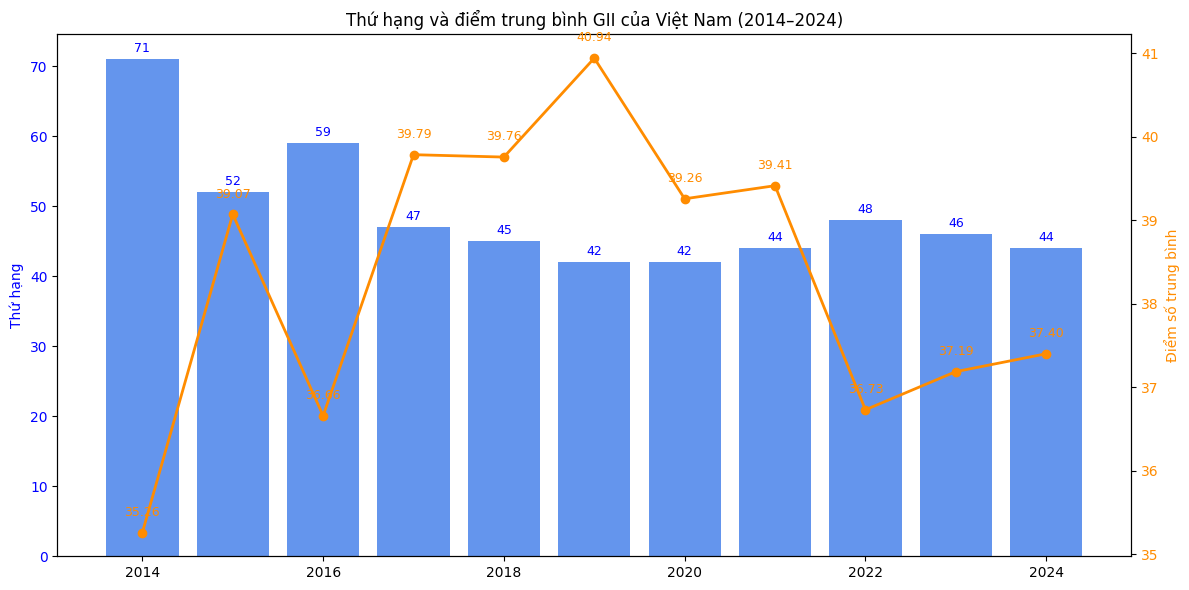

In [ ]:
# 1. Đọc thứ hạng từ sheet 'Thứ hạng GII'
df_rank = pd.read_excel(file_path, sheet_name="Thứ hạng GII")
rank_series = df_rank.iloc[0, 1:].astype(int)  # loại bỏ cột đầu (Việt Nam)
rank_series.index = rank_series.index.astype(int)

# 2. Đọc điểm từ sheet 'VN_pearson'
df_score = pd.read_excel(file_path, sheet_name="VN_pearson")
score_columns = [
    'Thể chế',
    'Nguồn lực và nghiên cứu',
    'Cơ sở hạ tầng',
    'Trình độ phát triển của thị trường',
    'Trình độ phát triển kinh doanh',
    'Sản phẩm tri thức và công nghệ',
    'Sản phẩm sáng tạo'
]
df_score["Điểm trung bình"] = df_score[score_columns].mean(axis=1)
score_series = df_score.set_index("Năm")["Điểm trung bình"]

# 3. Gộp dữ liệu và lọc từ 2014–2024
df_vn = pd.DataFrame({
    "Rank": rank_series,
    "Score": score_series
}).loc[2014:2024].reset_index().rename(columns={"index": "Year"})

# 4. Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Cột: Rank
ax1.bar(df_vn["Year"], df_vn["Rank"], color='cornflowerblue')
ax1.set_ylabel("Thứ hạng", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
for x, y in zip(df_vn["Year"], df_vn["Rank"]):
    ax1.text(x, y + 1, f"{int(y)}", color='blue', ha='center', fontsize=9)

# Đường: Điểm trung bình
ax2 = ax1.twinx()
ax2.plot(df_vn["Year"], df_vn["Score"], color='darkorange', marker='o', linewidth=2)
ax2.set_ylabel("Điểm số trung bình", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
for x, y in zip(df_vn["Year"], df_vn["Score"]):
    ax2.text(x, y + 0.2, f"{y:.2f}", color='darkorange', ha='center', fontsize=9)

# Tiêu đề và trục
plt.title("Thứ hạng và điểm trung bình GII của Việt Nam (2014–2024)")
plt.xlabel("Năm")
plt.tight_layout()
plt.show()


## 2.2. Biểu đồ radar chart cho 7 nước trung bình trong giai đoạn 2014-2024

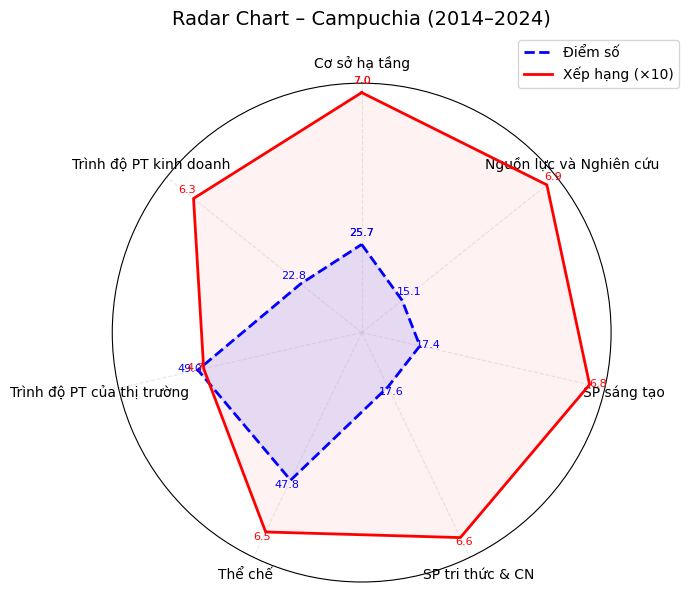

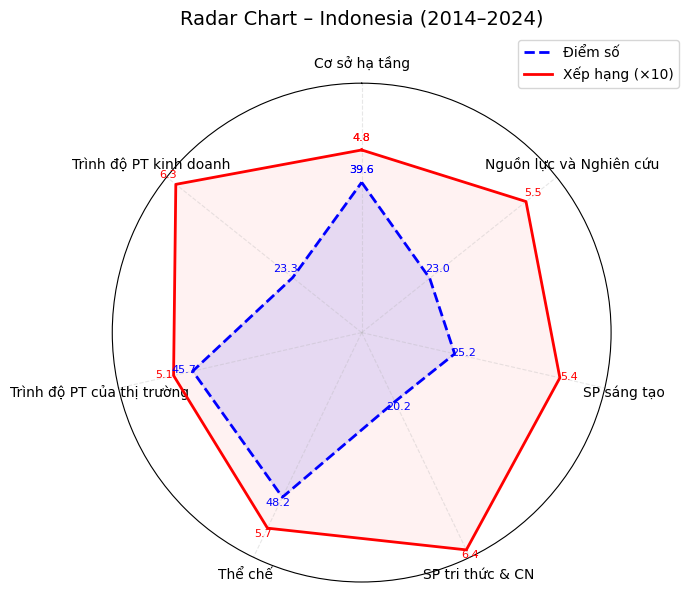

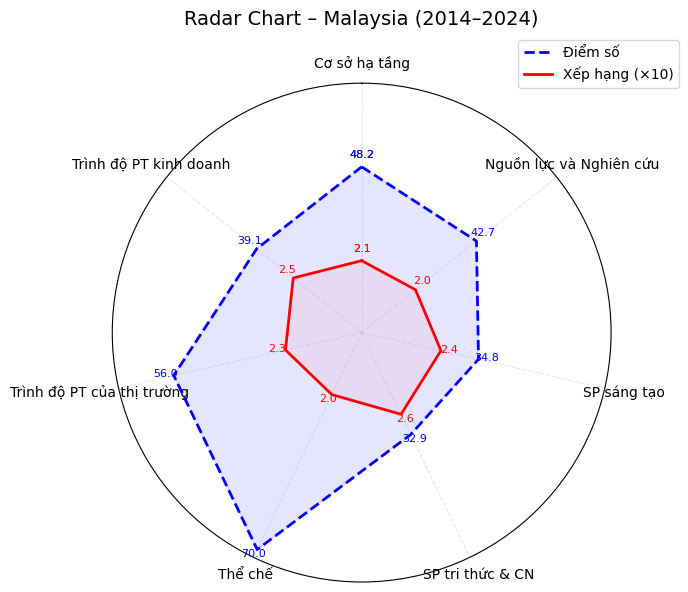

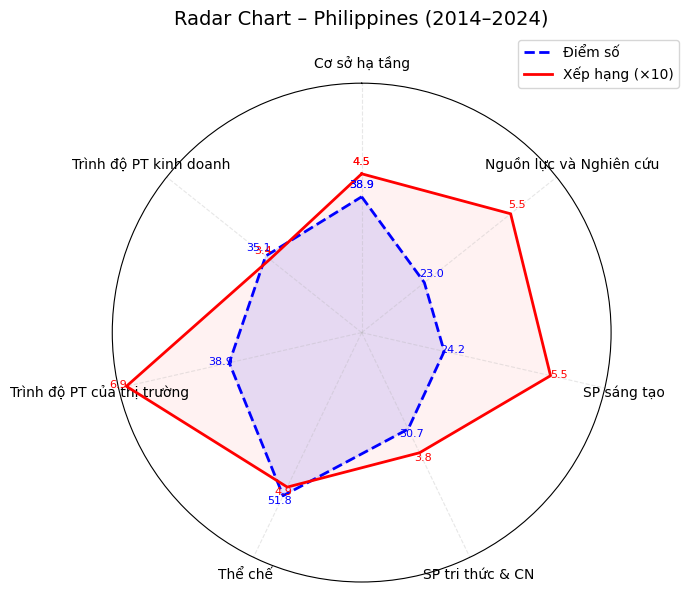

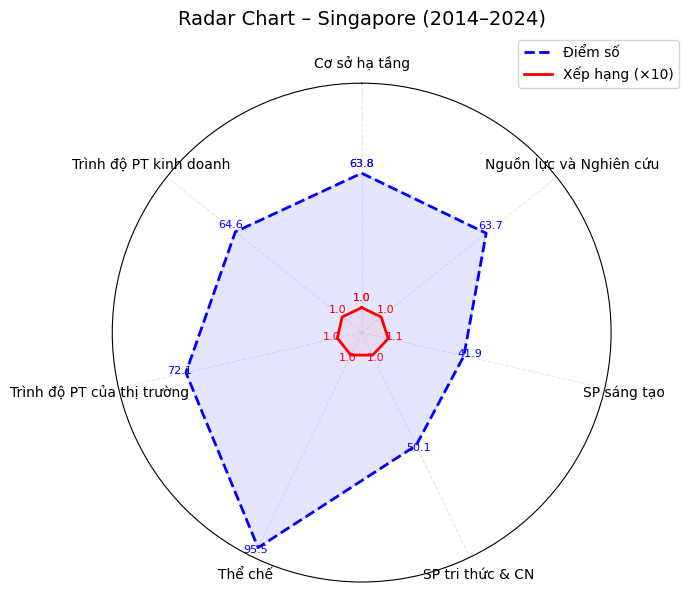

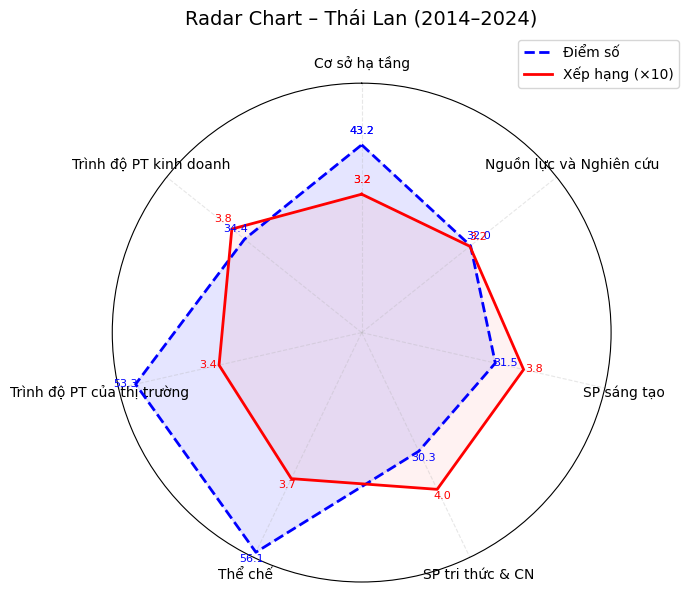

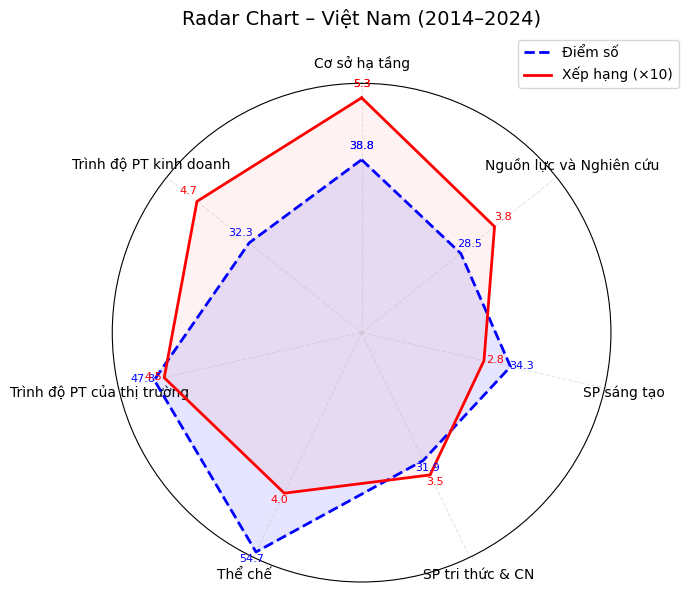

In [56]:
excel_file = pd.ExcelFile(file_path)
gii_sheets = [
    "Thể chế", "Nguồn lực và Nghiên cứu", "Cơ sở hạ tầng",
    "Trình độ PT của thị trường", "Trình độ PT kinh doanh",
    "SP tri thức & CN", "SP sáng tạo"
]

# Gộp dữ liệu
gii_dataframes = []
for sheet in gii_sheets:
    df = excel_file.parse(sheet)
    df["Trụ cột"] = sheet
    gii_dataframes.append(df)
df_all_gii = pd.concat(gii_dataframes, ignore_index=True)

# Chuyển sang long format
df_long_gii = df_all_gii.melt(id_vars=["Quốc gia", "Trụ cột"], var_name="Năm", value_name="Score")
df_long_gii["Năm"] = df_long_gii["Năm"].astype(int)

# Tính điểm GII trung bình (2014–2024)
df_score_avg = df_long_gii.groupby(["Quốc gia", "Trụ cột"])["Score"].mean().reset_index()

# Tính thứ hạng trung bình
ranked_years = []
for year in range(2014, 2025):
    df_year = df_long_gii[df_long_gii["Năm"] == year].copy()
    df_year["Rank"] = df_year.groupby("Trụ cột")["Score"].rank(ascending=False, method="min")
    ranked_years.append(df_year[["Quốc gia", "Trụ cột", "Rank"]])
df_rank_avg = pd.concat(ranked_years).groupby(["Quốc gia", "Trụ cột"])["Rank"].mean().reset_index()

# Gộp điểm và xếp hạng lại
df_radar_data = pd.merge(df_score_avg, df_rank_avg, on=["Quốc gia", "Trụ cột"])

# Danh sách quốc gia
countries_to_plot = df_radar_data["Quốc gia"].unique()
rank_scale = 10  # Hệ số scale để phóng đại rank

# Vẽ 7 radar chart
for country in countries_to_plot:
    df_country = df_radar_data[df_radar_data["Quốc gia"] == country]
    categories = df_country["Trụ cột"].tolist()
    values_score = df_country["Score"].tolist()
    values_rank = (df_country["Rank"] * rank_scale).tolist()  # scale rank

    # Đóng vòng
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    values_score += values_score[:1]
    values_rank += values_rank[:1]

    # Radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Vẽ điểm số
    ax.plot(angles, values_score, linestyle='dashed', linewidth=2, color='blue', label='Điểm số')
    ax.fill(angles, values_score, color='blue', alpha=0.1)

    # Vẽ xếp hạng
    ax.plot(angles, values_rank, linestyle='solid', linewidth=2, color='red', label='Xếp hạng (×10)')
    ax.fill(angles, values_rank, color='red', alpha=0.05)

    # Label điểm số
    for angle, sc in zip(angles, values_score):
        ax.text(angle, sc + 2.5, f"{sc:.1f}", color='blue', ha='center', fontsize=8)

    # Label xếp hạng (giá trị gốc)
    for angle, rk, rk_original in zip(angles, values_rank, df_country["Rank"].tolist() + [df_country["Rank"].tolist()[0]]):
        ax.text(angle, rk + 2.5, f"{rk_original:.1f}", color='red', ha='center', fontsize=8)

    # Trục
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([])
    ax.set_rlabel_position(0)
    ax.grid(True, linestyle='--', alpha=0.3)

    plt.title(f"Radar Chart – {country} (2014–2024)", y=1.1, fontsize=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))
    plt.tight_layout()
    plt.show()


## 2.3. Biểu đồ radar chart của VN riêng năm 2024

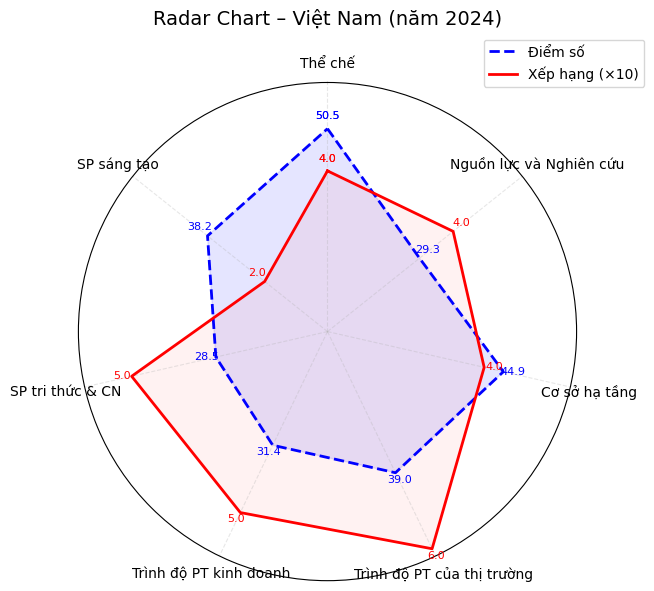

In [41]:
gii_sheets = [
    "Thể chế", "Nguồn lực và Nghiên cứu", "Cơ sở hạ tầng",
    "Trình độ PT của thị trường", "Trình độ PT kinh doanh",
    "SP tri thức & CN", "SP sáng tạo"
]

# Gộp dữ liệu trụ cột
dfs = []
for sheet in gii_sheets:
    df = excel_file.parse(sheet)
    df["Trụ cột"] = sheet
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

# Chuyển long format
df_long = df_all.melt(id_vars=["Quốc gia", "Trụ cột"], var_name="Năm", value_name="Score")
df_long["Năm"] = df_long["Năm"].astype(int)

# Lọc dữ liệu Việt Nam năm 2024
df_vn_2024 = df_long[(df_long["Quốc gia"] == "Việt Nam") & (df_long["Năm"] == 2024)].copy()

# Tính rank của Việt Nam năm 2024
df_2024 = df_long[df_long["Năm"] == 2024].copy()
df_2024["Rank"] = df_2024.groupby("Trụ cột")["Score"].rank(ascending=False, method="min")
df_vn_2024 = pd.merge(df_vn_2024, df_2024[["Quốc gia", "Trụ cột", "Rank"]],
                      on=["Quốc gia", "Trụ cột"], how="left")

# Chuẩn bị dữ liệu vẽ
categories = df_vn_2024["Trụ cột"].tolist()
values_score = df_vn_2024["Score"].tolist()
values_rank = (df_vn_2024["Rank"] * 10).tolist()  # scale rank để dễ nhìn

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]
values_score += values_score[:1]
values_rank += values_rank[:1]

# Vẽ radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.plot(angles, values_score, linestyle='dashed', linewidth=2, color='blue', label='Điểm số')
ax.fill(angles, values_score, color='blue', alpha=0.1)

ax.plot(angles, values_rank, linestyle='solid', linewidth=2, color='red', label='Xếp hạng (×10)')
ax.fill(angles, values_rank, color='red', alpha=0.05)

for angle, sc in zip(angles, values_score):
    ax.text(angle, sc + 2.5, f"{sc:.1f}", color='blue', ha='center', fontsize=8)

for angle, rk, rk_original in zip(angles, values_rank, df_vn_2024["Rank"].tolist() + [df_vn_2024["Rank"].tolist()[0]]):
    ax.text(angle, rk + 2.5, f"{rk_original:.1f}", color='red', ha='center', fontsize=8)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_yticks([])
ax.grid(True, linestyle='--', alpha=0.3)
plt.title("Radar Chart – Việt Nam (năm 2024)", y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))
plt.tight_layout()
plt.show()

## 2.4. Biểu đồ điểm 7 trụ cột GII của Việt Nam

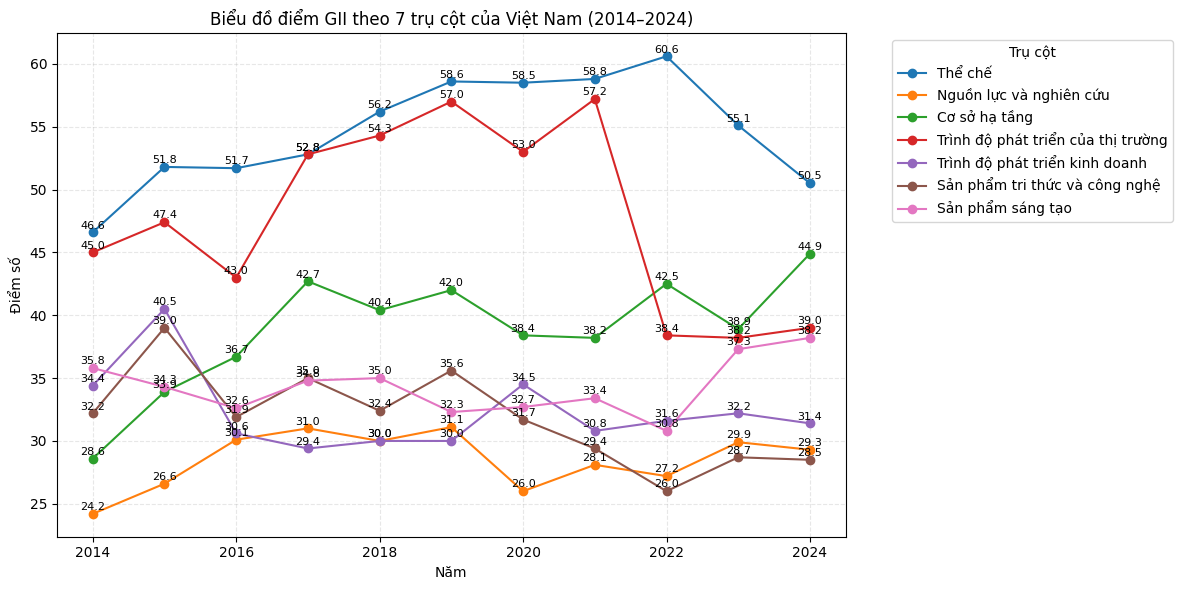

In [57]:
df = pd.read_excel(file_path, sheet_name="VN_pearson")

# 2. Lọc dữ liệu từ năm 2014–2024
df = df[df["Năm"].between(2014, 2024)]

# 3. Các trụ cột GII
pillars = [
    'Thể chế',
    'Nguồn lực và nghiên cứu',
    'Cơ sở hạ tầng',
    'Trình độ phát triển của thị trường',
    'Trình độ phát triển kinh doanh',
    'Sản phẩm tri thức và công nghệ',
    'Sản phẩm sáng tạo'
]

# 4. Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for pillar in pillars:
    plt.plot(df["Năm"], df[pillar], marker='o', label=pillar)
    for x, y in zip(df["Năm"], df[pillar]):
        plt.text(x, y + 0.3, f"{y:.1f}", ha='center', fontsize=8)

# 5. Tùy chỉnh hiển thị
plt.title("Biểu đồ điểm GII theo 7 trụ cột của Việt Nam (2014–2024)")
plt.xlabel("Năm")
plt.ylabel("Điểm số")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Trụ cột", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## <span style="color: blue">3. THỐNG KÊ MÔ TẢ</span>


## Hé lộ bức tranh tổng thể về đổi mới sáng tạo và tăng trưởng ở ASEAN


In [58]:
# Sheet mapping
sheet_mapping = {
    "TC": "Thể chế",
    "NNLNC": "Nguồn lực và Nghiên cứu",
    "CSHT": "Cơ sở hạ tầng",
    "PTTT": "Trình độ PT của thị trường",
    "PTKD": "Trình độ PT kinh doanh",
    "SPTT": "SP tri thức & CN",
    "SPST": "SP sáng tạo"
}

# Bước 1: Gộp tất cả dữ liệu trụ thành long format
df_all = pd.DataFrame()
for short, sheet in sheet_mapping.items():
    df = pd.read_excel(file_path, sheet_name=sheet)
    df_long = df.melt(id_vars="Quốc gia", var_name="Năm", value_name=short)
    df_all = df_long if df_all.empty else pd.merge(df_all, df_long, on=["Quốc gia", "Năm"], how="outer")

# Bước 2: Gộp GDP growth
df_gdp = pd.read_excel(file_path, sheet_name="gdp")
df_gdp_long = df_gdp.melt(id_vars="Quốc gia", var_name="Năm", value_name="GDP")

# Bước 3: Gộp lại và ép kiểu
df_merged = pd.merge(df_all, df_gdp_long, on=["Quốc gia", "Năm"], how="inner")
df_merged["Năm"] = df_merged["Năm"].astype(int)


# Bước 5: Tính thống kê mô tả
variables = ["TC", "NNLNC", "CSHT", "PTTT", "PTKD", "SPTT", "SPST", "GDP"]
stats = []

for var in variables:
    series = df_merged[var].dropna()
    stats.append({
        "Biến": var,
        "N": series.count(),
        "Minimum": round(series.min(), 2),
        "Maximum": round(series.max(), 2),
        "Mean": round(series.mean(), 3),
        "Std.Deviation": round(series.std(ddof=1), 4)
    })

# Bước 6: Xuất bảng
df_stats = pd.DataFrame(stats).set_index("Biến")
print(df_stats)

        N  Minimum  Maximum     Mean  Std.Deviation
Biến                                               
TC     77    37.60     99.1   60.579        16.5779
NNLNC  77    11.10     73.3   32.558        15.4121
CSHT   77    21.00     69.5   42.603        11.4224
PTTT   77    29.20     78.2   51.832        11.0442
PTKD   77    14.40     69.4   35.951        13.6705
SPTT   77    11.20     55.4   30.518        10.3021
SPST   77     7.30     47.4   29.916         8.6350
GDP    77    22.04   1396.3  439.521       316.1158


## <span style="color: blue">4. TƯƠNG QUAN PEARSON: MQH GIỮA TĂNG TRƯỞNG KINH TẾ VÀ ĐỔI MỚI SÁNG TẠO</span>


## 4.1. Tiền xử lý dữ liệu trước khi chạy ma trận tương quan

In [ ]:
excel_file_corr = pd.ExcelFile(file_path)
df_gdp = excel_file_corr.parse("ln(gdp)")  # hoặc sheet khác

# Bước 2: Đọc sheet GDP danh nghĩa (đã log trước đó)
df_gdp = excel_file_corr.parse("ln(gdp)")
df_gdp_long = df_gdp.melt(id_vars="Quốc gia", var_name="Năm", value_name="GDP")
df_gdp_long["Năm"] = df_gdp_long["Năm"].astype(int)
df_gdp_long["Ln(GDP)"] = np.log(df_gdp_long["GDP"])

# Bước 3: Gộp 7 trụ GII thành long-format và merge
sheets_dict = {
    "TC": "Thể chế",
    "NNLNC": "Nguồn lực và Nghiên cứu",
    "CSHT": "Cơ sở hạ tầng",
    "PTTT": "Trình độ PT của thị trường",
    "PTKD": "Trình độ PT kinh doanh",
    "SPTT": "SP tri thức & CN",
    "SPST": "SP sáng tạo"
}

all_frames = []
for short, sheet in sheets_dict.items():
    df = excel_file_corr.parse(sheet)
    df_long = df.melt(id_vars="Quốc gia", var_name="Năm", value_name=short)
    df_long["Năm"] = df_long["Năm"].astype(int)
    all_frames.append(df_long)


# Gộp các trụ lại theo Quốc gia - Năm
df_merged_tru = reduce(lambda left, right: pd.merge(left, right, on=["Quốc gia", "Năm"]), all_frames)

# Bước 4: Gộp dữ liệu GDP (đã log) vào bảng trụ
df_ready = pd.merge(df_merged_tru, df_gdp_long[["Quốc gia", "Năm", "Ln(GDP)"]], on=["Quốc gia", "Năm"])

# Kết quả: df_ready là bảng hoàn chỉnh gồm 7 trụ GII + Ln(GDP)

## 4.2. Tiến hành trực quan ma trận tương quan thông qua biểu đồ heatmap

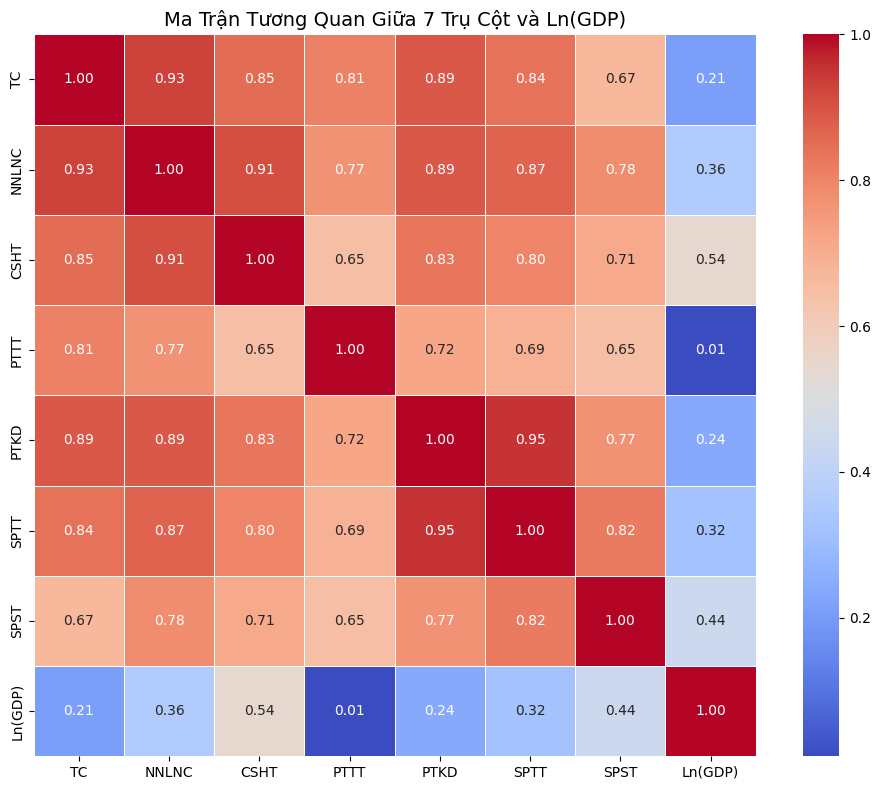

In [96]:
# Bước 1: Chọn các cột cần tính tương quan
columns_to_correlate = ['TC', 'NNLNC', 'CSHT', 'PTTT', 'PTKD', 'SPTT', 'SPST', 'Ln(GDP)']

# Đảm bảo df có đủ các cột trên
df_corr = df_ready[columns_to_correlate].dropna()

# Bước 2: Tính ma trận tương quan Pearson
correlation_matrix = df_corr.corr(method="pearson").round(2)

# Bước 3: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Ma Trận Tương Quan Giữa 7 Trụ Cột và Ln(GDP)', fontsize=14)
plt.tight_layout()
plt.show()